<a href="https://colab.research.google.com/github/JaiVR/suttmltask_1/blob/main/sutt_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('sutt.csv')

X = dataset.iloc[:, :-1].values
# y is the gpl ,the dependent variable
y = dataset.iloc[:, -1].values

In [ ]:
dataset.dtypes

SEX                               object
 AGES                            float64
ADMISSION MODE                    object
CGPA - 1                         float64
CGPA-2                           float64
 CLUB / DEPARTMENT                object
BOARD STUDIED                     object
DAYS SINCE LAST SHOWER             int64
BIRTHDAY                          object
TREATS GIVEN                       int64
 HAS A S/O ?                      object
ATTENDS LECTURES                  object
CHARACTER                         object
PIZZERIA EXPENDITURE (annual)      int64
GRAMS / MONTH                    float64
GPL                               object
dtype: object

In [ ]:
print(X)

[['male' 19.0 'BITSAT' ... 'LITE' 20495 5.0]
 ['female' 21.0 'DASA' ... 'GHOT' 2361 0.2]
 ['female' 20.0 'BITSAT' ... 'GHOT' 8548 0.3]
 ...
 ['female' 21.0 'BITSAT' ... 'LITE' 17559 5.4]
 ['male' 22.0 'DASA' ... 'GHOT' 16411 8.7]
 ['female' 17.0 'BITSAT' ... 'GHOT' 5476 0.25]]


In [ ]:
print(y)

['NO' 'YES' 'YES' ... 'NO' 'NO' 'YES']


In [ ]:
#taking care of missing values
#this code replaces the missing value with the mean of that particular column

columns_to_impute = [1,3,4,7,9,13,14]

X[:, columns_to_impute] = X[:, columns_to_impute].astype(float)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, columns_to_impute])
X[:, columns_to_impute] = imputer.transform(X[:, columns_to_impute])

In [ ]:
print(X)

[['male' 19.0 'BITSAT' ... 'LITE' 20495.0 5.0]
 ['female' 21.0 'DASA' ... 'GHOT' 2361.0 0.2]
 ['female' 20.0 'BITSAT' ... 'GHOT' 8548.0 0.3]
 ...
 ['female' 21.0 'BITSAT' ... 'LITE' 17559.0 5.4]
 ['male' 22.0 'DASA' ... 'GHOT' 16411.0 8.7]
 ['female' 17.0 'BITSAT' ... 'GHOT' 5476.0 0.25]]


In [ ]:
dataset.dtypes

SEX                               object
 AGES                            float64
ADMISSION MODE                    object
CGPA - 1                         float64
CGPA-2                           float64
 CLUB / DEPARTMENT                object
BOARD STUDIED                     object
DAYS SINCE LAST SHOWER             int64
BIRTHDAY                          object
TREATS GIVEN                       int64
 HAS A S/O ?                      object
ATTENDS LECTURES                  object
CHARACTER                         object
PIZZERIA EXPENDITURE (annual)      int64
GRAMS / MONTH                    float64
GPL                               object
dtype: object

In [ ]:
#encoding the categorical data using one hot encoding
#independent variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

dataset.iloc[:, 5].replace('', 'NA', inplace=True)

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,2,5,6,10,11,12])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[0.0 1.0 1.0 ... 4.0 20495.0 5.0]
 [1.0 0.0 0.0 ... 1.0 2361.0 0.2]
 [1.0 0.0 1.0 ... 4.0 8548.0 0.3]
 ...
 [1.0 0.0 1.0 ... 4.0 17559.0 5.4]
 [0.0 1.0 0.0 ... 3.0 16411.0 8.7]
 [1.0 0.0 1.0 ... 1.0 5476.0 0.25]]


In [ ]:
#encoding dependent variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
print(y)

[0 1 1 ... 0 0 1]


In [ ]:
#splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
print(X_train)

[[0.0 1.0 1.0 ... 4.0 15140.0 8.6]
 [0.0 1.0 1.0 ... 4.0 13289.0 7.8]
 [1.0 0.0 0.0 ... 4.0 4086.0 0.2]
 ...
 [1.0 0.0 1.0 ... 4.0 17559.0 5.4]
 [0.0 1.0 0.0 ... 0.0 19499.0 9.9]
 [1.0 0.0 0.0 ... 4.0 6819.0 0.25]]


In [ ]:
print(X_test)

[[1.0 0.0 0.0 ... 4.0 7746.0 0.35]
 [0.0 1.0 1.0 ... 3.0 15944.0 4.3]
 [1.0 0.0 0.0 ... 0.0 2357.0 0.45]
 ...
 [0.0 1.0 1.0 ... 2.0 12406.0 9.0]
 [0.0 1.0 1.0 ... 1.0 16605.0 9.0]
 [0.0 1.0 0.0 ... 0.0 12061.0 3.4]]


In [ ]:
print(y_train)

[0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0
 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1
 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0
 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0
 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1
 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1
 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0
 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0
 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 0 0 0 

In [ ]:
print(y_test)

[1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0
 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0
 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0
 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1
 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0
 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0]


In [ ]:
#feauture scaling using standaridization
from sklearn.preprocessing import StandardScaler
columns_to_stand = [1,3,4,7,9,13,14,15]
sc = StandardScaler()
X_train[:, columns_to_stand] = sc.fit_transform(X_train[:, columns_to_stand])
X_test[:, columns_to_stand] = sc.transform(X_test[:, columns_to_stand])

In [ ]:
print(X_train)

[[0.0 0.7491854665119192 1.0 ... 4.0 15140.0 8.6]
 [0.0 0.7491854665119192 1.0 ... 4.0 13289.0 7.8]
 [1.0 -1.3347829672348437 0.0 ... 4.0 4086.0 0.2]
 ...
 [1.0 -1.3347829672348437 1.0 ... 4.0 17559.0 5.4]
 [0.0 0.7491854665119192 0.0 ... 0.0 19499.0 9.9]
 [1.0 -1.3347829672348437 0.0 ... 4.0 6819.0 0.25]]


In [ ]:
print(X_test)

[[1.0 -1.3347829672348437 0.0 ... 4.0 7746.0 0.35]
 [0.0 0.7491854665119192 1.0 ... 3.0 15944.0 4.3]
 [1.0 -1.3347829672348437 0.0 ... 0.0 2357.0 0.45]
 ...
 [0.0 0.7491854665119192 1.0 ... 2.0 12406.0 9.0]
 [0.0 0.7491854665119192 1.0 ... 1.0 16605.0 9.0]
 [0.0 0.7491854665119192 0.0 ... 0.0 12061.0 3.4]]


/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<function matplotlib.pyplot.show(close=None, block=None)>

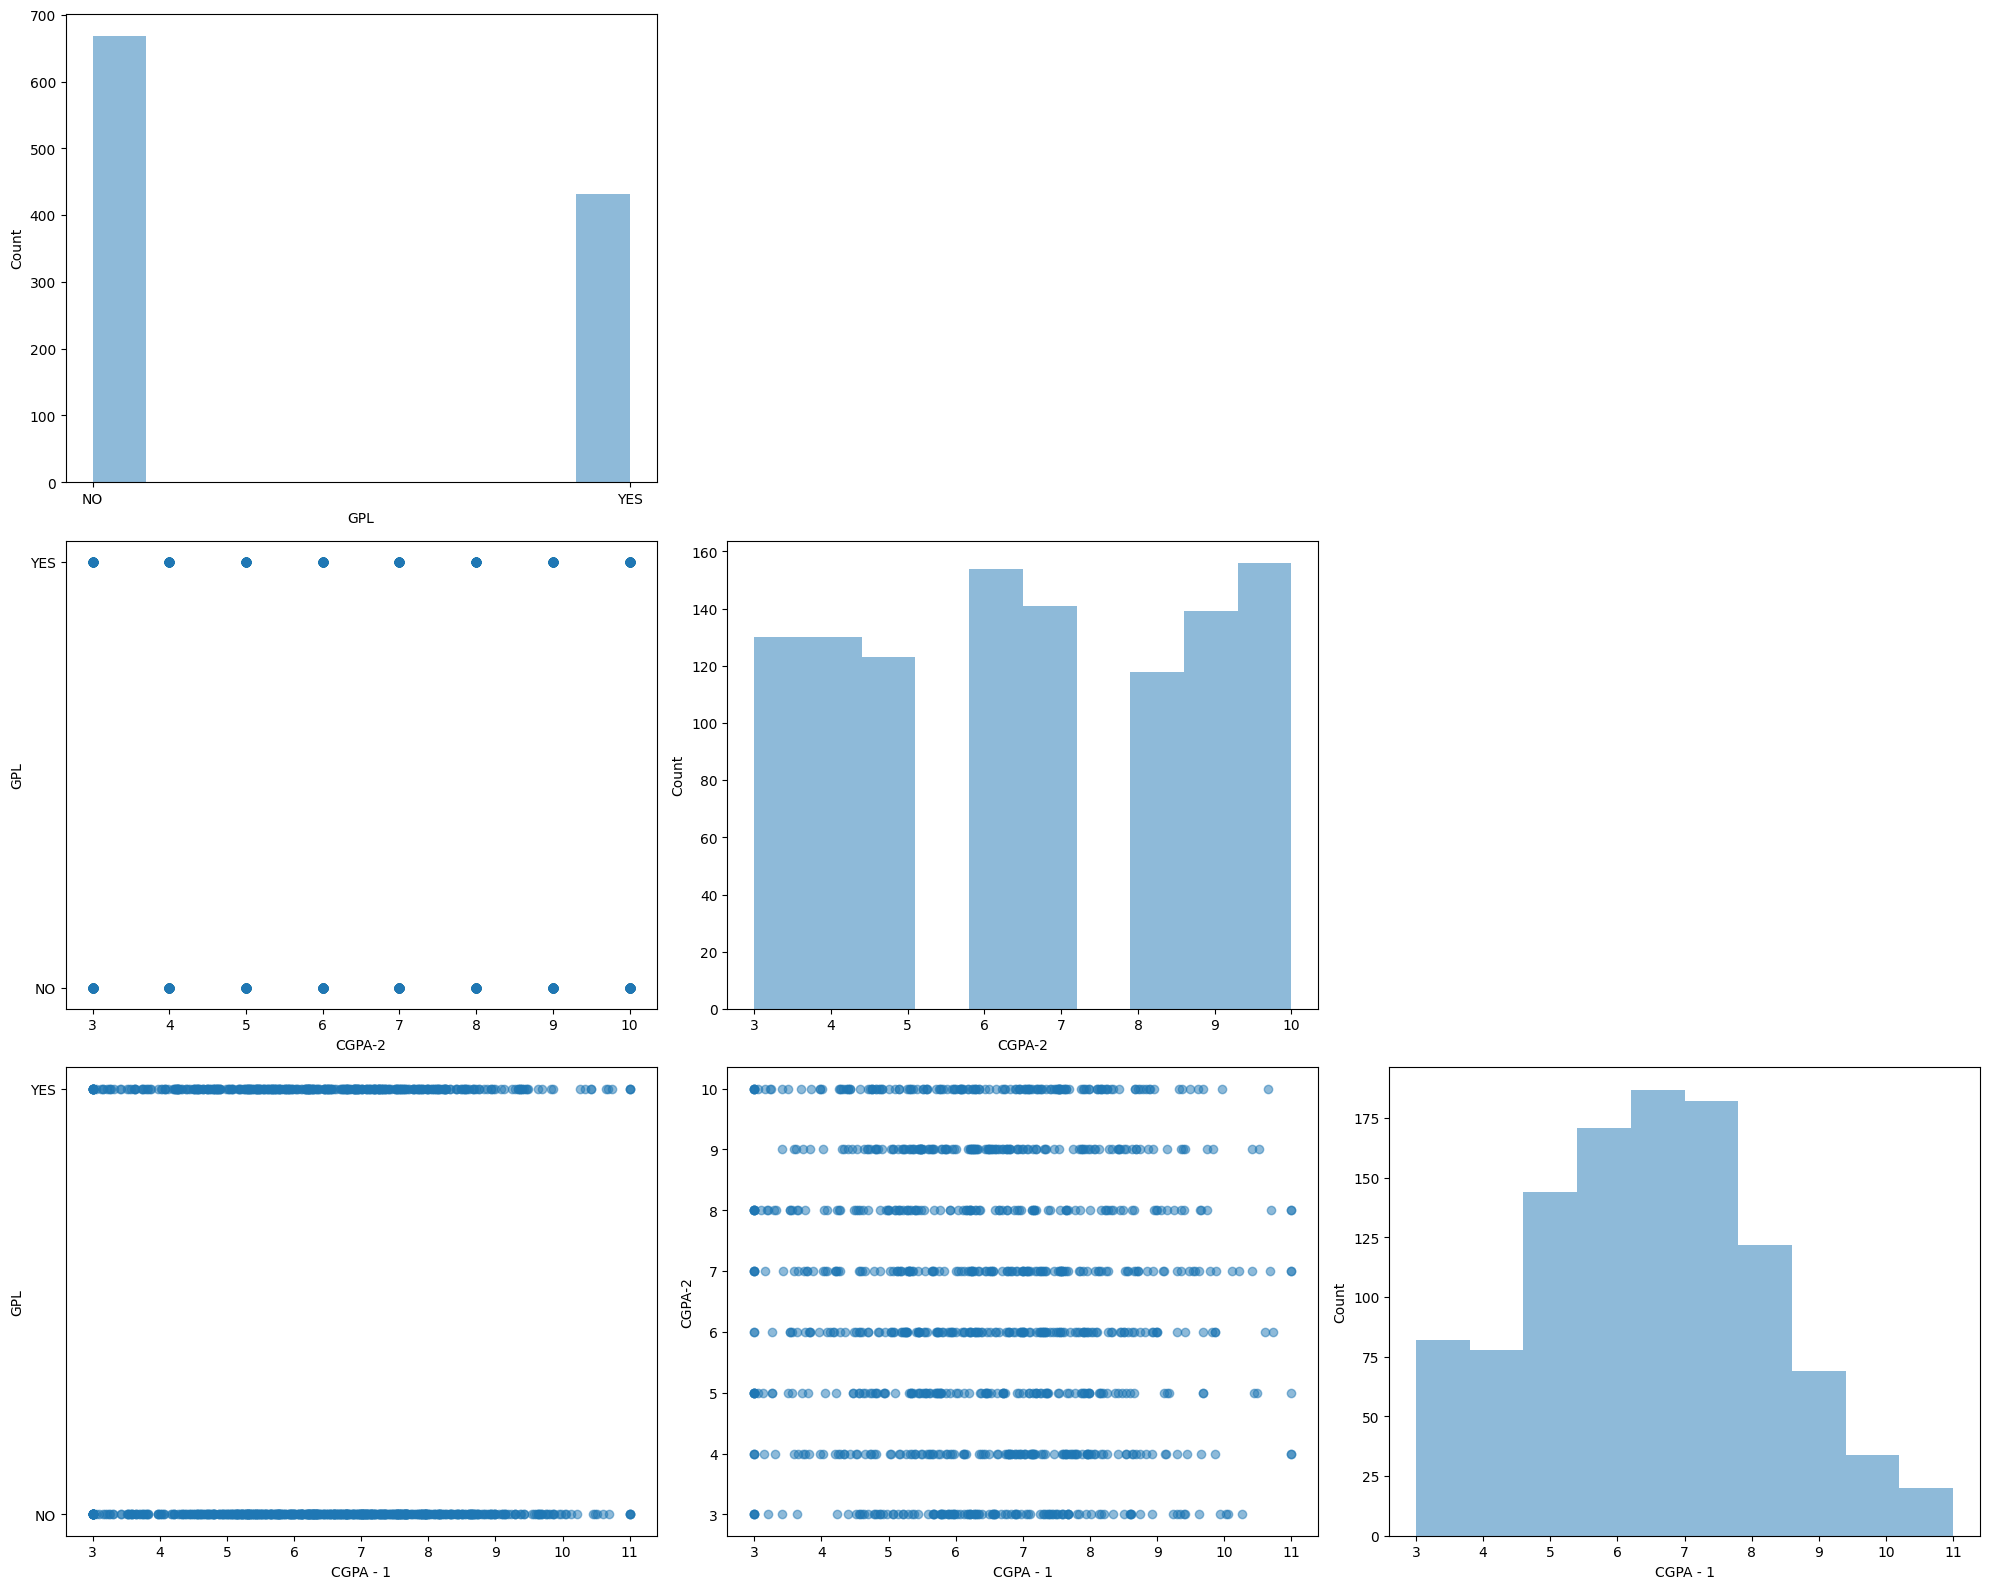

In [ ]:
#plot cgpas vs gpl
from mlxtend.plotting import scatterplotmatrix
columns_to_plot = ["GPL","CGPA-2","CGPA - 1"]
scatterplotmatrix(dataset[columns_to_plot].values, figsize =(20,16), names= columns_to_plot, alpha=0.5)
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

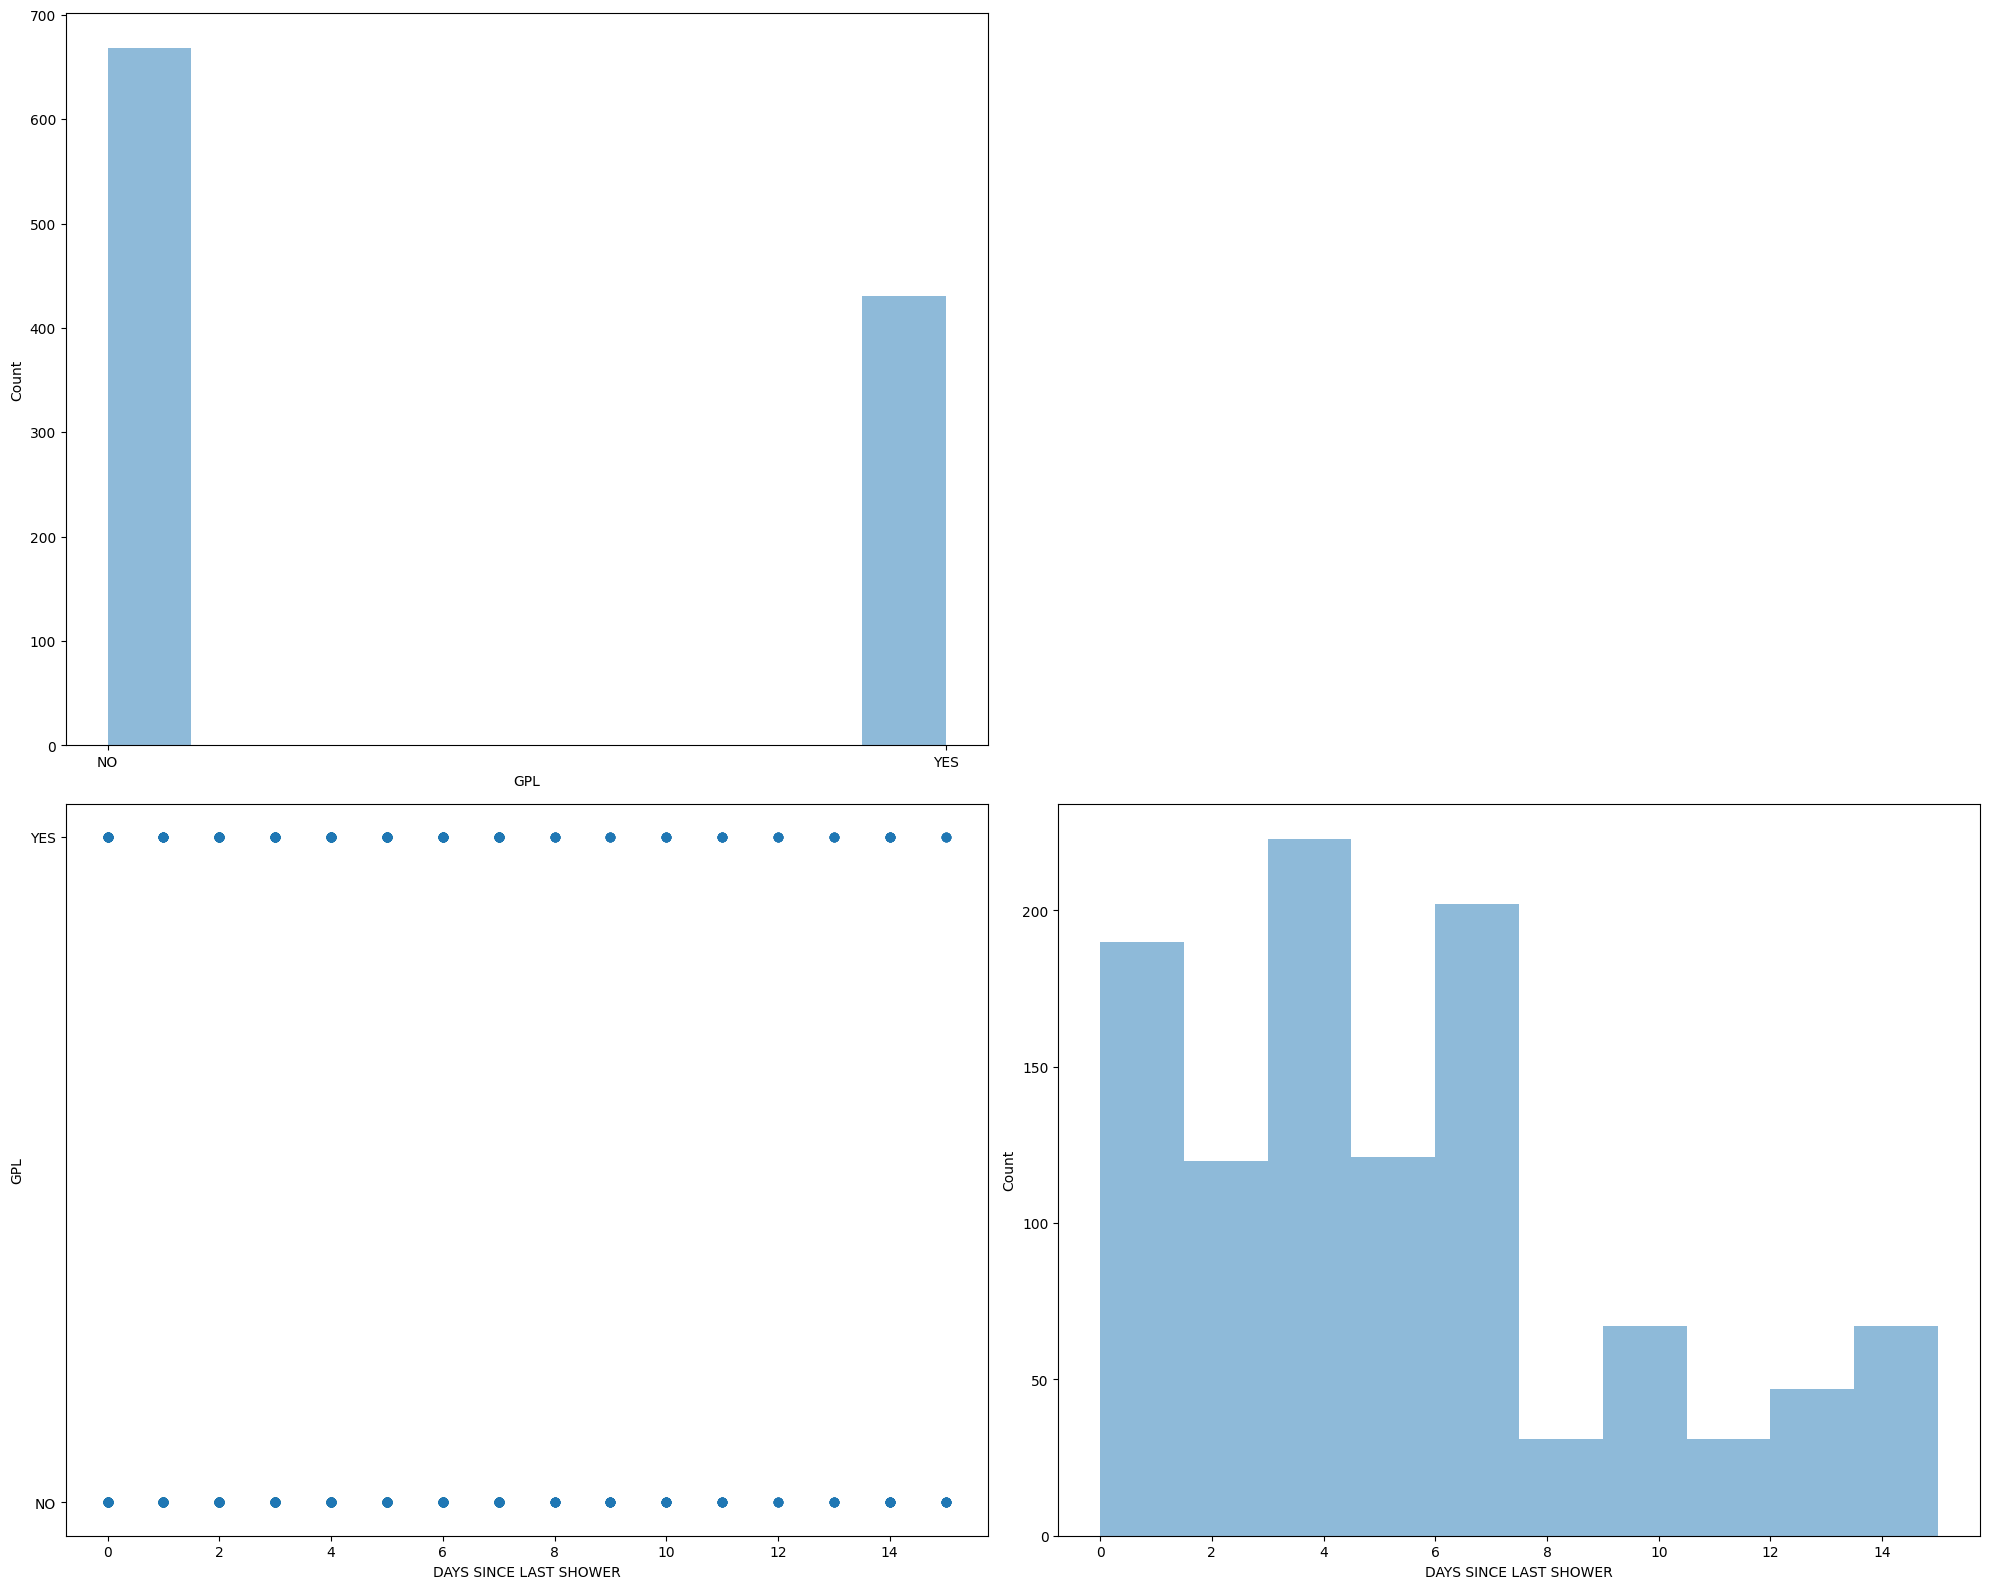

In [ ]:
#plot cgpas vs gpl
from mlxtend.plotting import scatterplotmatrix
columns_to_plot = ["GPL","DAYS SINCE LAST SHOWER"]
scatterplotmatrix(dataset[columns_to_plot].values, figsize =(20,16), names= columns_to_plot, alpha=0.5)
plt.tight_layout()
plt.show

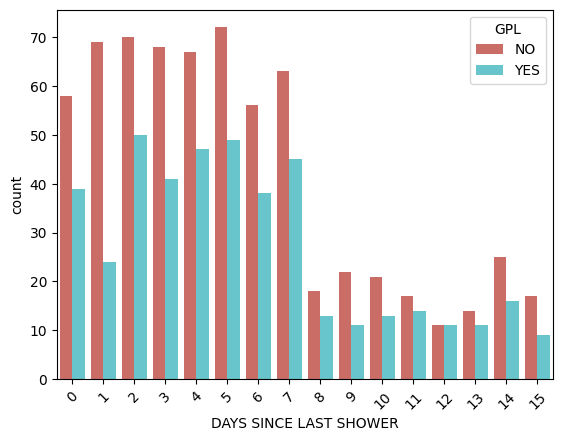

In [ ]:
import seaborn as sns
sns.countplot(x='DAYS SINCE LAST SHOWER', data=dataset, palette='hls', hue='GPL')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#ridge model
from sklearn.linear_model import Ridge
classifier = Ridge(random_state = 0)
classifier.fit(X_train[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]], y_train)

Ridge(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]])
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0.96272025 1.        ]
 [0.09233901 0.        ]
 [0.96272025 1.        ]
 [0.42153532 1.        ]
 [0.21897455 0.        ]
 [0.96272025 1.        ]
 [0.09233901 0.        ]
 [0.42153532 0.        ]
 [0.76015948 1.        ]
 [0.63352394 0.        ]
 [0.42153532 0.        ]
 [0.63352394 1.        ]
 [0.76015948 1.        ]
 [0.63352394 0.        ]
 [0.09233901 0.        ]
 [0.09233901 0.        ]
 [0.09233901 0.        ]
 [0.42153532 0.        ]
 [0.76015948 0.        ]
 [0.63352394 1.        ]
 [0.63352394 0.        ]
 [0.25118532 1.        ]
 [0.63352394 0.        ]
 [0.96272025 1.        ]
 [0.42153532 1.        ]
 [0.96272025 1.        ]
 [0.63352394 1.        ]
 [0.96272025 1.        ]
 [0.63352394 1.        ]
 [0.09233901 0.        ]
 [0.09233901 0.        ]
 [0.63352394 0.        ]
 [0.76015948 1.        ]
 [0.09233901 0.        ]
 [0.76015948 1.        ]
 [0.76015948 1.        ]
 [0.01968627 0.        ]
 [0.96272025 1.        ]
 [0.42153532 1.        ]
 [0.6657347  0.        ]


In [ ]:
y_pred_roundoff=np.where(np.array(y_pred)>0.5,1,0)

In [ ]:
#confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_roundoff)
print(cm)
accuracy_score(y_test, y_pred_roundoff)

[[111  18]
 [ 33  58]]


0.7681818181818182